In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('/content/drive/My Drive/PROJECT 1001/processed_dataset.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.isnull().any()

QUARTER                       False
MONTH                         False
DAY_OF_MONTH                  False
DAY_OF_WEEK                   False
ARR_DELAY                     False
ARR_DEL15                     False
AIR_TIME                      False
DISTANCE                      False
PRCP                          False
WDSP                          False
VISIB                         False
SLP                           False
DELAY_TO_NO_DELAY_RATIO       False
DELAY_PROB                    False
DelayScore                    False
DELAY_NO_DELAY_RATIO_DEST     False
DELAY_PROB_DEST               False
DelayScore_DEST               False
TIME_GROUP_NUM                False
TIME_ARR_DEL15                False
TIME_ARR_DELAY                False
TIME_DEP_DEL15                False
TIME_DEP_DELAY                False
CARRIER_TAXI_OUT              False
CARRIER_CARRIER_DELAY         False
CARRIER_NAS_DELAY             False
ORIGIN_TAXI_OUT               False
ORIGIN_CARRIER_DELAY        

##**Correlation Heatmap for all features**

In [0]:
def plot_heatmap(data, target):
  X = data.drop([target], axis=1) #independent columns
  y = data[target] #target column
  # get correlations of each features in dataset
  corrmat = data.corr()
  top_corr_features = corrmat.index
  plt.figure(figsize=(30,30))
  # plot heat map
  g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGnBu")
  fig = g.get_figure()
  #fig.savefig('/content/drive/My Drive/PROJECT 1001/Figures/Total_HeatMap.png')
  return data[top_corr_features].corr()


In [0]:
def plot_arr_heatmap(corrs, target):  
  corrs = corrs[target]
  corrs_df_data = [{i:k} for i,k in zip(corrs.index, corrs.values)]
  corrs_df = pd.DataFrame(corrs.values)
  corrs_df.index = corrs.index
  corrs_df.to_numpy().shape
  corrs_df = corrs_df.sort_values(by = 0, ascending = False)

  plt.figure(figsize=(5,20))
  # plot heat map
  g=sns.heatmap(corrs_df,annot=True,cmap="plasma")
  fig = g.get_figure()
  #fig.savefig('/content/drive/My Drive/PROJECT 1001/Figures/ARR_DEL15_HeatMap.png')
  return corrs_df

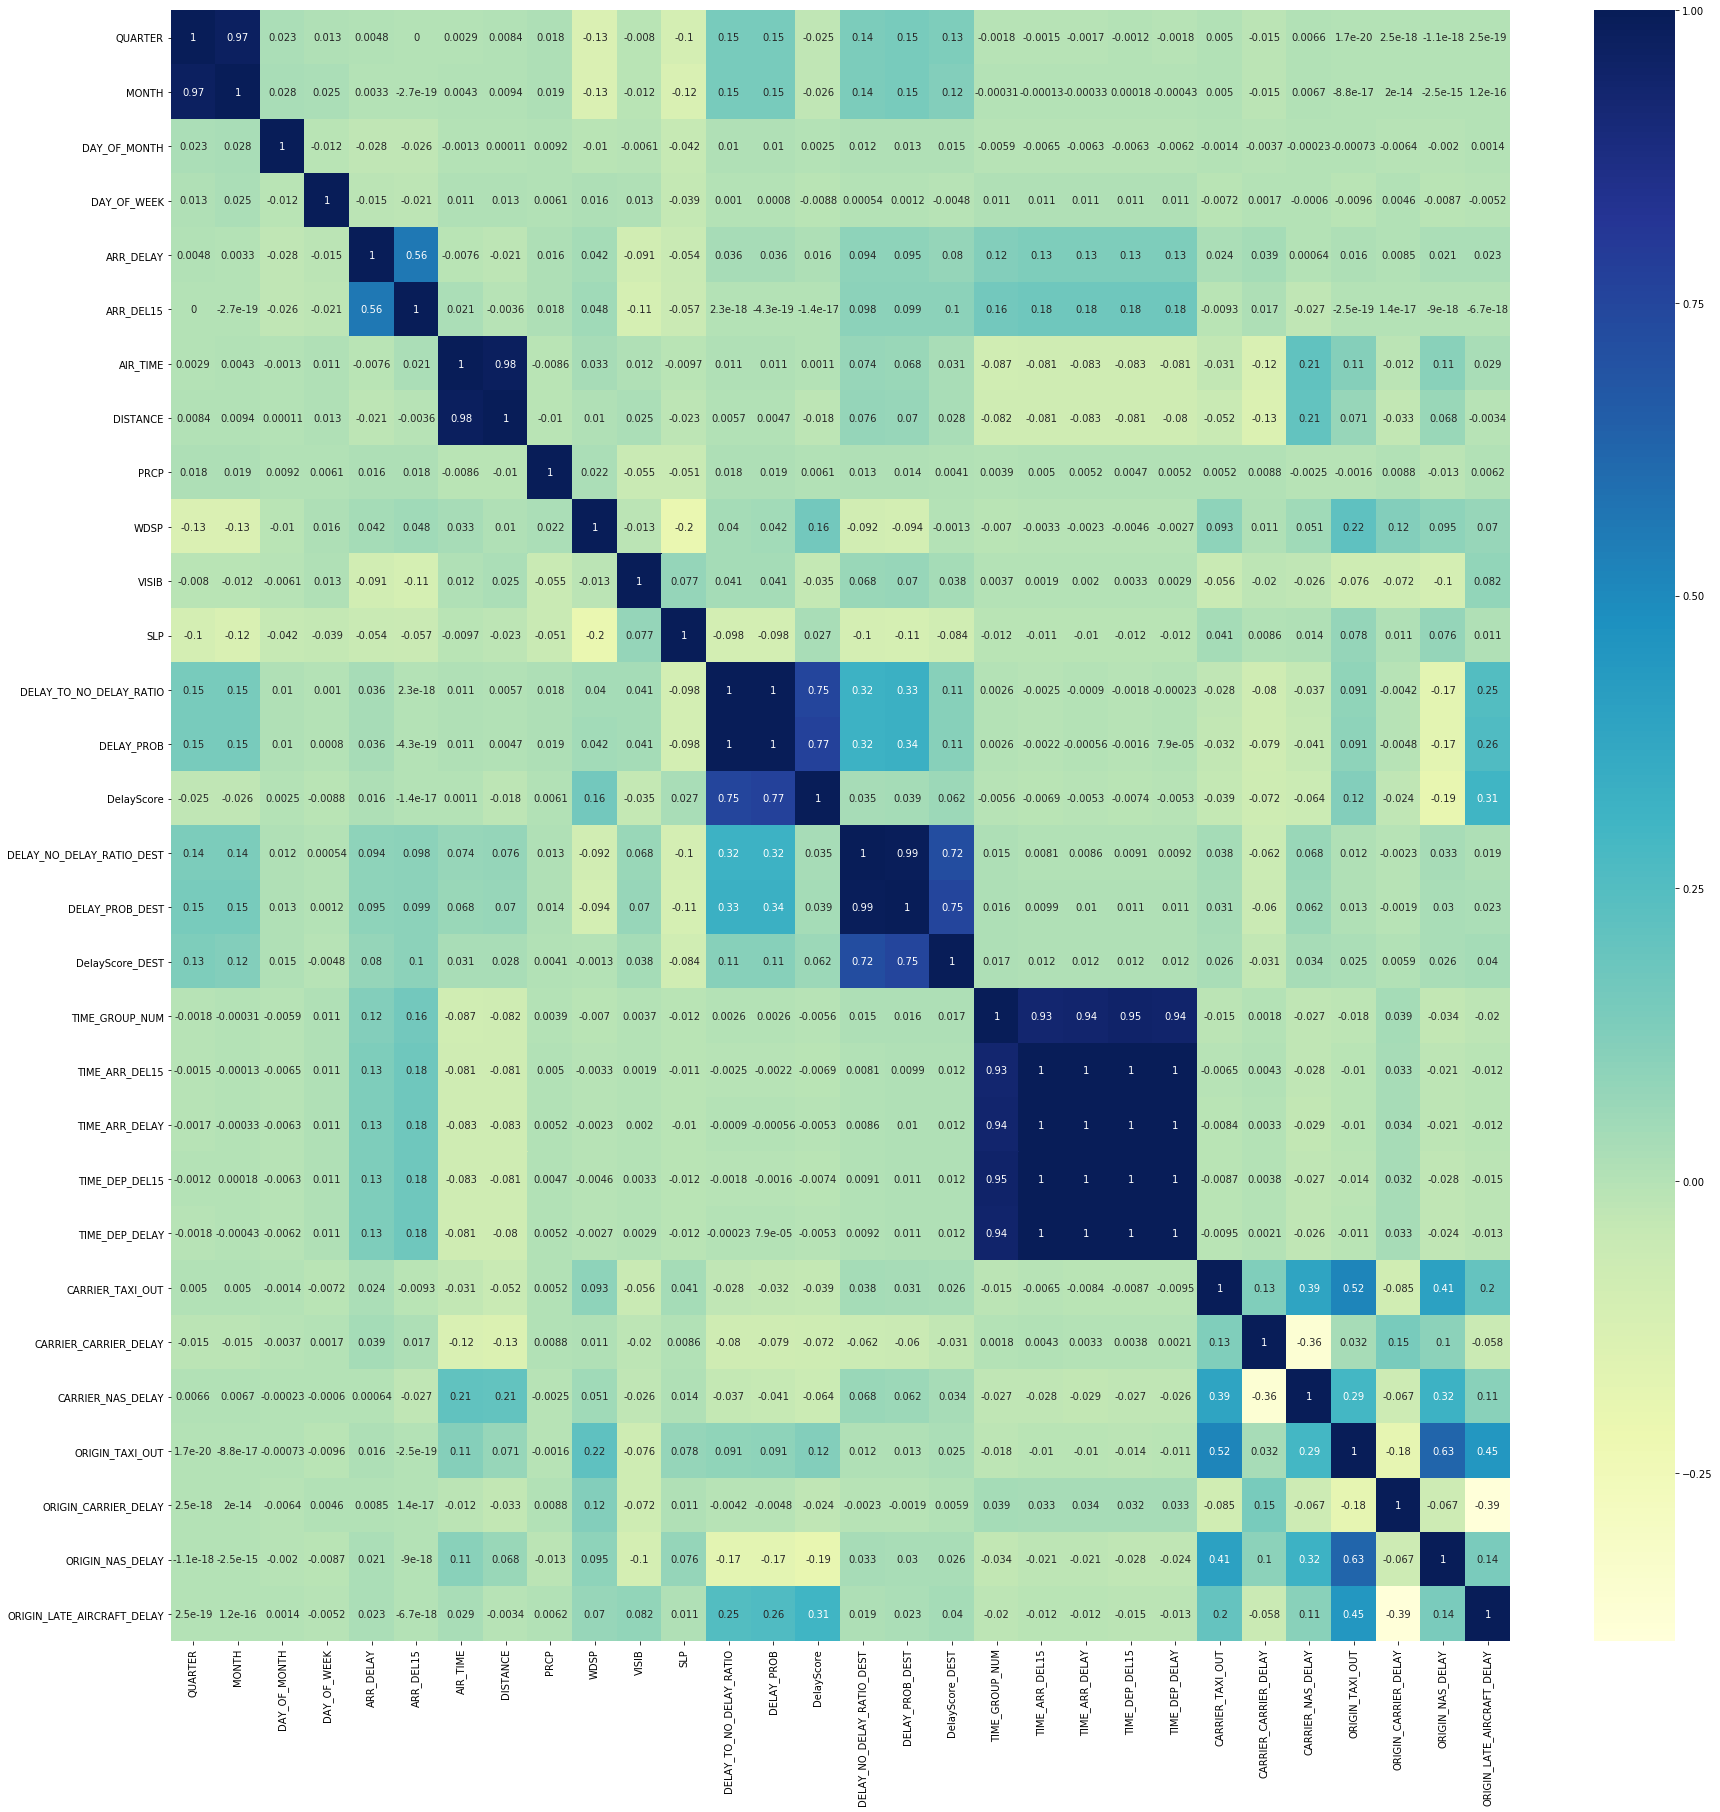

In [0]:
corr = plot_heatmap(data, 'ARR_DEL15')

##**Correlation heatmap of features against ARR_DEL15 (the target variable for classification)**

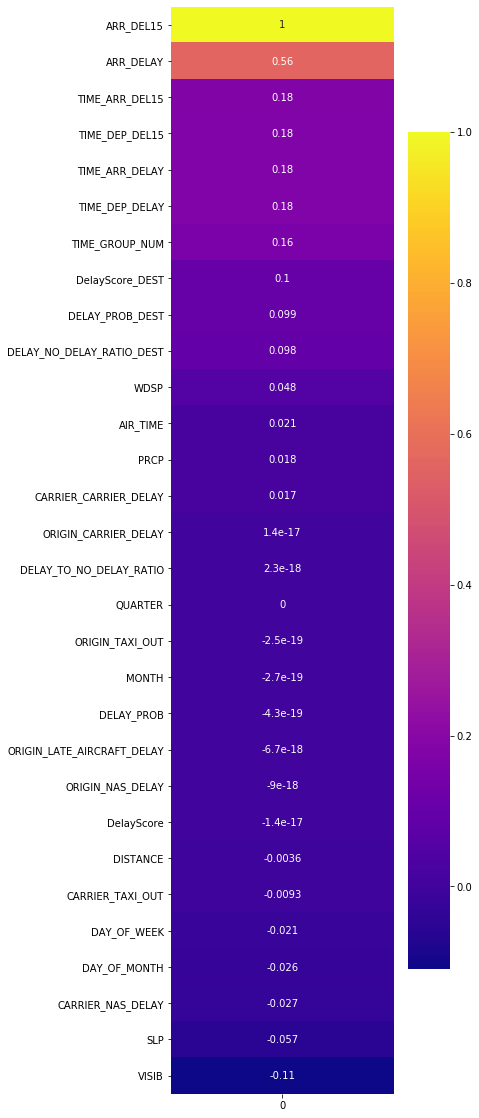

In [0]:
arr_corr = plot_arr_heatmap(corr, 'ARR_DEL15')

##**Correlation heatmap of features against ARR_DELAY (the target variable for regression)**

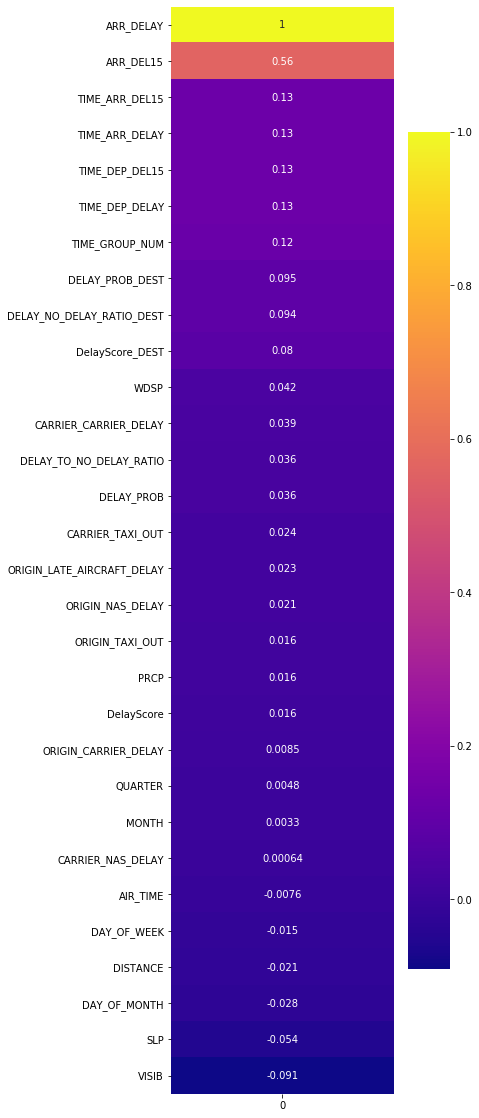

In [0]:
arr_corr = plot_arr_heatmap(corr, 'ARR_DELAY')